In [2]:
import os
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import *
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df = pd.read_csv('to_ML.csv').T

Gen_ID = df[35:]
df = df.drop(df.index[35])
df = df.drop(df.index[34])
df  = df.drop(df.index[0])
df = df.drop(df.index[16:20])
target = []
for index in df.index:
    res_ev = re.search('Fibroblast', index)
    res_oskm = re.search('_OSKM_', index)
    if re.search('Fibroblast', index) != None:
        target.append(1)
    if re.search('iPSC', index) != None:
        target.append(0)

In [112]:
logit_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.7))
logit_pipe.fit(df, target)
cross_val_score(logit_pipe, df, target, cv=6, scoring='f1').mean()

1.0

In [137]:
logit_best = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=10.084, max_iter=500))
logit_best.fit(df, target)
cross_val_score(logit_best, df, target, cv=6, scoring='f1').mean()

1.0

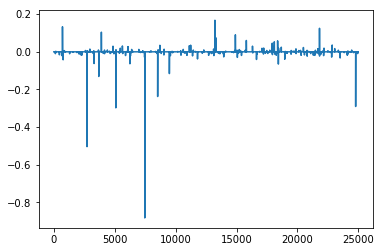

In [138]:
plt.plot(logit_best.steps[1][1].coef_[0])

In [139]:
mTor = list(pd.read_csv('mTOR2.txt').columns)
mTor = [re.sub(' ', '', x) for x in mTor]

In [140]:
mTor

['AKT1',
 'AKT1S1',
 'ATG13',
 'BNIP3',
 'BRAF',
 'CCNE1',
 'CDK2',
 'CLIP1',
 'CYCS',
 'DDIT4',
 'DEPTOR',
 'EEF2',
 'EEF2K',
 'EIF4A1',
 'EIF4B',
 'EIF4E',
 'EIF4EBP1',
 'FBXW11',
 'HRAS',
 'IKBKB',
 'IRS1',
 'KRAS',
 'MAP2K1',
 'MAP2K2',
 'MAPK1',
 'MAPK3',
 'MAPKAP1',
 'MLST8',
 'MTOR',
 'NRAS',
 'PDCD4',
 'PDPK1',
 'PLD1',
 'PLD2',
 'PML',
 'POLDIP3',
 'PPARGC1A',
 'PRKCA',
 'PRR5',
 'PXN',
 'RAC1',
 'RAF1',
 'RB1CC1',
 'RHEB',
 'RHOA',
 'RICTOR',
 'RPS6KA1',
 'RPS6KB1',
 'RPTOR',
 'RRAGA',
 'RRAGB',
 'RRAGC',
 'RRAGD',
 'RRN3',
 'SFN',
 'SGK1',
 'SREBF1',
 'SSPO',
 'TSC1',
 'TSC2',
 'ULK1',
 'ULK2',
 'YWHAB',
 'YWHAE',
 'YWHAG',
 'YWHAH',
 'YWHAQ',
 'YWHAZ',
 'YY1']

In [141]:
def best_genes(logit_coefs):
    best_logit_features = [x for x in logit_coefs if abs(x) != 0]
    best_logit_features_numbers = [list(logit_coefs).index(x) for x in best_logit_features]
    best_genes = [Gen_ID[x][0] for x in best_logit_features_numbers]
    return best_logit_features, best_logit_features_numbers, best_genes

def compare_with_mtor(best_genes, mtor_genes):
    return set(best_genes) & set(mtor_genes)

In [142]:
b_l, b_log_feachures, b_genes = best_genes(logit_best.steps[1][1].coef_[0])

In [143]:
b_genes

['PDPN',
 'DDI2,RSC1A1',
 'NBL1,MINOS1-NBL1',
 'PATJ',
 'L1TD1',
 'SH3GLB1',
 'LRIG2',
 'PDIA3,PDIA3P1',
 'ZNF687',
 'LMNA',
 'POU2F1',
 'PRRX1',
 'RNU6-1319P,RNU6-747P,RNU6-791P,RNU6-1076P,U6,RNU6-241P,RNU6-1199P,RNU6-177P,RNU6-355P,RNU6-860P,RNU6-447P,RNU6-1054P,RNU6-1118P,RNU6-705P,RNU6-1100P,RNU6-1217P,RNU6-785P',
 'MARCKSL1',
 'TRIM33',
 'ADAR',
 'KIAA0040',
 'KDM5B',
 'COMMD3,COMMD3-BMI1',
 'ARID5B',
 'TSPAN15',
 'CHST3',
 'FAS',
 'TCF7L2',
 'GRK5',
 'BAG3',
 'PARD3',
 'JMJD1C',
 'ACTA2',
 'SORBS1',
 'MMS19',
 'ILK',
 'KIAA1549L',
 'CD44',
 'PRDM11',
 'CREB3L1',
 'CCDC85B',
 'DRAP1',
 'TMEM133',
 'ARHGEF12',
 'SORL1',
 'UBASH3B',
 'DKK3',
 'LPXN',
 'PLA2G16',
 'CHKA',
 'MMP1',
 'MMP3',
 'KDELC2',
 'ZNF202',
 'NANOGP1,NANOGP8,NANOG,AC007536.1,NANOGP4,NANOGP7',
 'PHC1,PHC1P1',
 'PTMA,PTMAP4,AC007537.4,AC007537.1',
 'EMP1',
 'RBMS2',
 'GLIPR1',
 'SYT1',
 'ACSS3',
 'TMEM263',
 'SCNN1A',
 'IFFO1',
 'SLC2A14',
 'SLC2A3',
 'DDX11,DDX12P,AC009533.1',
 'KRT8',
 'KITLG',
 'LUM',
 'APPL2',


In [145]:
compare_with_mtor(b_genes, mTor)

set()